<Figure size 432x432 with 0 Axes>

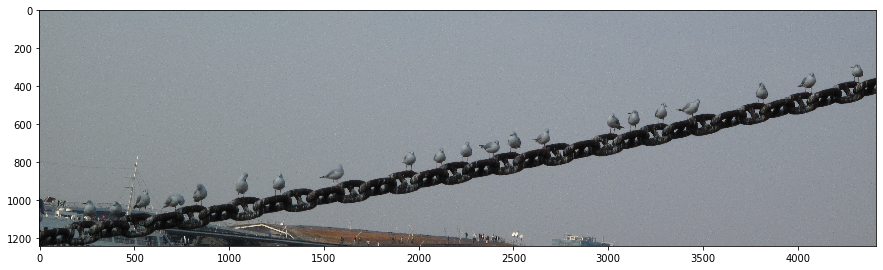

In [1]:
%load_ext autotime
import cv2 as cv
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.future import graph
from skimage.util import img_as_float
from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline

img = cv.cvtColor(cv.imread("im023.jpg"), cv.COLOR_BGR2RGB)
row, col = img.shape[:2]
plt.figure(figsize=(6,6))
img_reduc = img[(3*row)//8:(6*row)//8, :]
img_ready = cv.GaussianBlur(img_reduc,(9,9),3)

points = []
# def mouse_callback(event,x,y,flags,param):
#     if event == cv.EVENT_LBUTTONDOWN:
#         cv.circle(img_reduc, (x, y), 5, (0, 255, 0), -1)
#         points.append((y,x))

# h, w = (1000, 1000)
# finished = False
# cv.destroyAllWindows()
# cv.namedWindow('image', cv.WINDOW_NORMAL,)
# cv.setWindowTitle("image", "Press Esc to close and Left mouse to select point")
# cv.resizeWindow('image', w, h) #Reasonable size window
# cv.setMouseCallback('image', mouse_callback) #Mouse callback
# while(not finished):
#     cv.imshow('image', img_reduc)
#     k = cv.waitKey(4) & 0xFF
#     if k == 27:
#         break
# cv.destroyAllWindows()

points = [(998, 719), (972, 856), (932, 1073), (919, 1271), (870, 1572), (795, 1965), (786, 2119), (746, 2256), (720, 2406),
 (702, 2521), (680, 2680), (587, 3029), (583, 3139), (548, 3294),(512, 3440), (433, 3828), (388, 4071), (327, 4318), (1007, 560)]

plt.figure(figsize=(15,15))
plt.imshow(img_reduc)
plt.show()




In [2]:


# lab(5, 5, 0), 2000, 4, 1

def do_merge(img_ready, segments, thresh):
    def _weight_mean_color(graph, src, dst, n):
        diff = graph.nodes[dst]['mean color'] - graph.nodes[n]['mean color']
        diff = np.linalg.norm(diff)
        return {'weight': diff}

    def merge_mean_color(graph, src, dst):
        graph.nodes[dst]['total color'] += graph.nodes[src]['total color']
        graph.nodes[dst]['pixel count'] += graph.nodes[src]['pixel count']
        graph.nodes[dst]['mean color'] = (graph.nodes[dst]['total color'] / graph.nodes[dst]['pixel count'])
    g = graph.rag_mean_color(img_ready, segments)
    return graph.merge_hierarchical(segments, g, thresh=thresh, rag_copy=False, in_place_merge=True, merge_func=merge_mean_color, weight_func=_weight_mean_color)

time: 3.7 ms


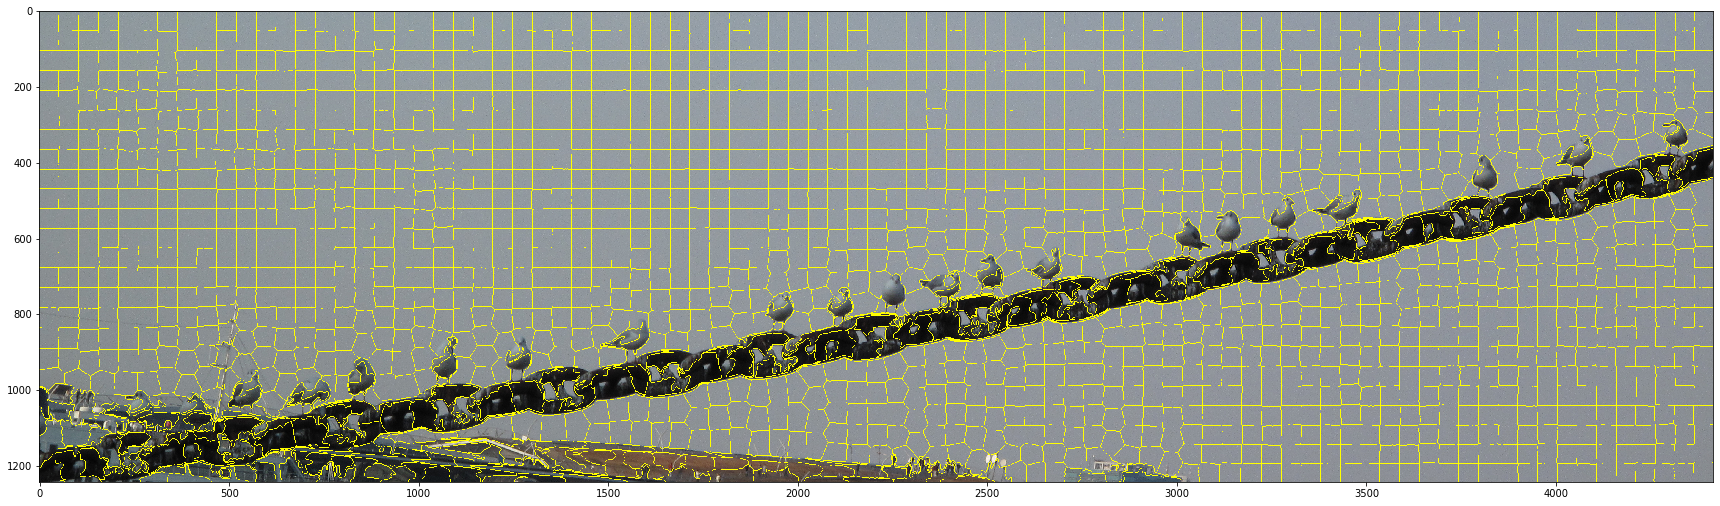

time: 20.6 s


In [3]:
segments = slic(img_ready, n_segments=2000, convert2lab=True, enforce_connectivity=True, compactness=6, sigma=1)
# segments = slic(img_ready, n_segments=2000, convert2lab=True, enforce_connectivity=True, compactness=5, sigma=0.01)
plt.figure(figsize=(30, 30))
# segments = do_merge(img_reduc, segments, 25)
plt.imshow(mark_boundaries(img_reduc, segments))
plt.show()

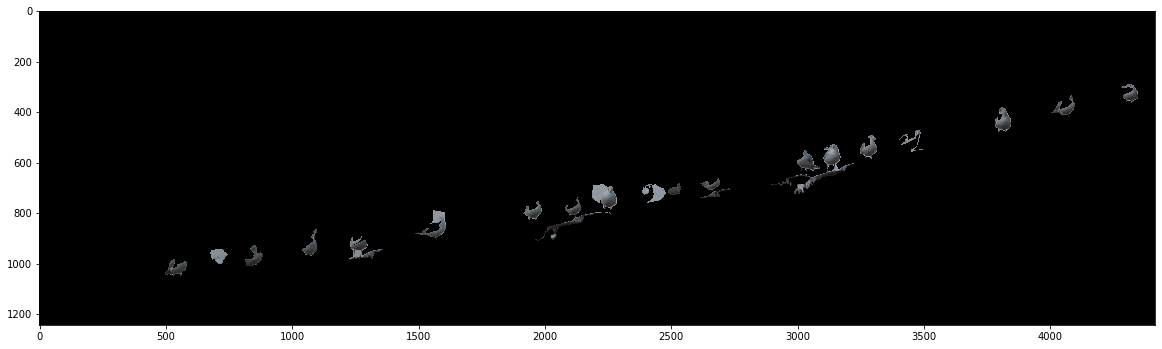

time: 2.4 s


In [4]:
img_tmp = np.zeros(img_reduc.shape[:2])
for (x,y) in points:
    label = segments[x, y]
    img_tmp[segments == label] = 1

one = img_tmp == 1
img_tmp = np.zeros(img_reduc.shape, dtype=np.uint64)
# img_tmp = img_reduc.copy()
img_tmp[one] = img_reduc[one]
plt.figure(figsize=(20, 20))
plt.imshow(img_tmp)
plt.imsave("im09.jpg", np.array(img_tmp, dtype=np.uint8))
plt.show()

<div dir="rtl">
طبق روش گفته شده در تمرین، از SLIC استفاده کردیم و با آزمون و خطا و البته تعریف هر پارامتری ورودی این تابع، بهینه ترین مقادیر را برای بدست آمدن نتیجه بهتر، انتخاب کردیم
</div>